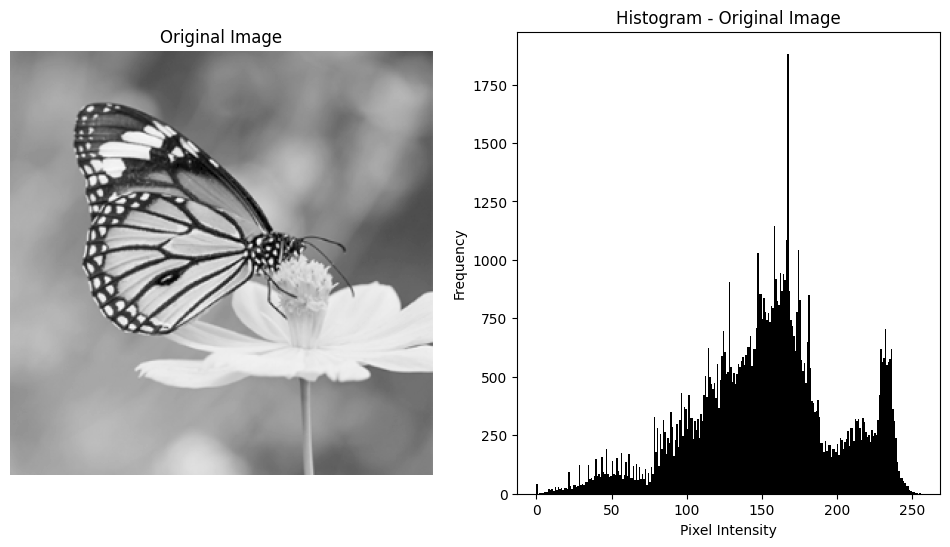

In [114]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "1.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def calculate_psnr(original, modified):
    mse = np.mean((original - modified) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def apply_transformation(image, c, gamma):
    normalized_image = image / 255.0  
    transformed_image = c * np.power(normalized_image, gamma)
    transformed_image = np.clip(transformed_image * 255, 0, 255).astype(np.uint8) 
    return transformed_image

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(original_image.ravel(), bins=256, range=[0, 256], color='black', alpha=1)
plt.title("Histogram - Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

In [115]:
bright_image = apply_transformation(original_image, c=1, gamma=0.5) 
dark_image = apply_transformation(original_image, c=1, gamma=1.8)    

psnr_bright = calculate_psnr(original_image, bright_image)
psnr_dark = calculate_psnr(original_image, dark_image)

In [116]:
psnr_bright = calculate_psnr(original_image, bright_image)
psnr_dark = calculate_psnr(original_image, dark_image)
print("PSNR (Parlaklık):", psnr_bright)
print("PSNR (Karanlık):", psnr_dark)


PSNR (Parlaklık): 27.34527476605432
PSNR (Karanlık): 26.744138724266435


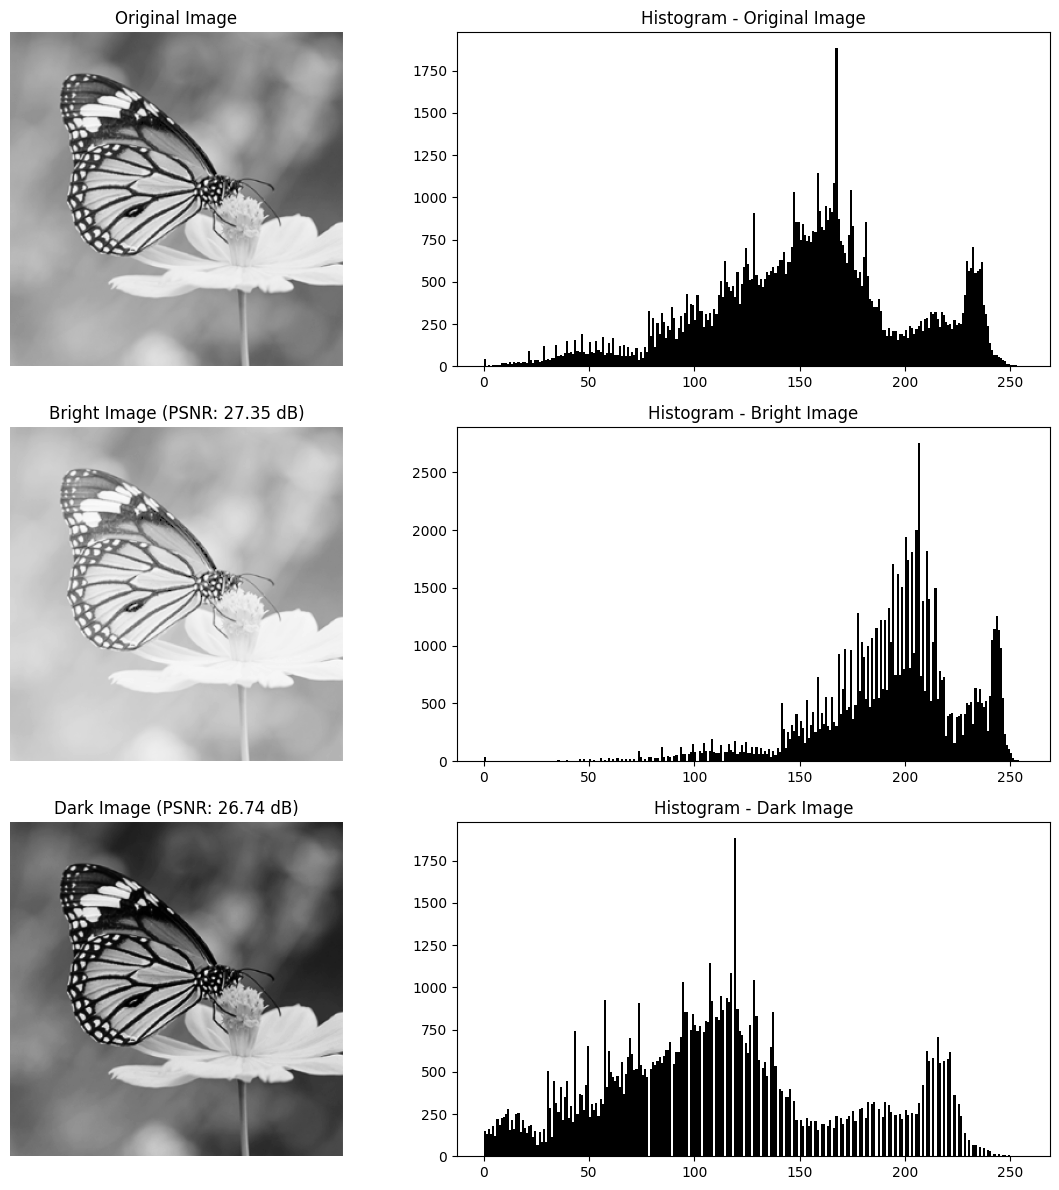

In [117]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(3, 2, 2)
plt.hist(original_image.ravel(), bins=256, range=[0, 256], color='black', alpha=1)
plt.title("Histogram - Original Image")

plt.subplot(3, 2, 3)
plt.imshow(bright_image, cmap='gray')
plt.title(f"Bright Image (PSNR: {psnr_bright:.2f} dB)")
plt.axis('off')
plt.subplot(3, 2, 4)
plt.hist(bright_image.ravel(), bins=256, range=[0, 256], color='black', alpha=1)
plt.title("Histogram - Bright Image")

plt.subplot(3, 2, 5)
plt.imshow(dark_image, cmap='gray')
plt.title(f"Dark Image (PSNR: {psnr_dark:.2f} dB)")
plt.axis('off')
plt.subplot(3, 2, 6)
plt.hist(dark_image.ravel(), bins=256, range=[0, 256], color='black', alpha=1)
plt.title("Histogram - Dark Image")

plt.tight_layout()
plt.show()


In [118]:
gamma_corrected_bright = apply_transformation(bright_image, c=1, gamma=1/0.5)  
gamma_corrected_dark = apply_transformation(dark_image, c=1, gamma=1/1.8)      

psnr_bright_corrected = calculate_psnr(gamma_corrected_bright, original_image)
psnr_dark_corrected = calculate_psnr(gamma_corrected_dark, original_image)

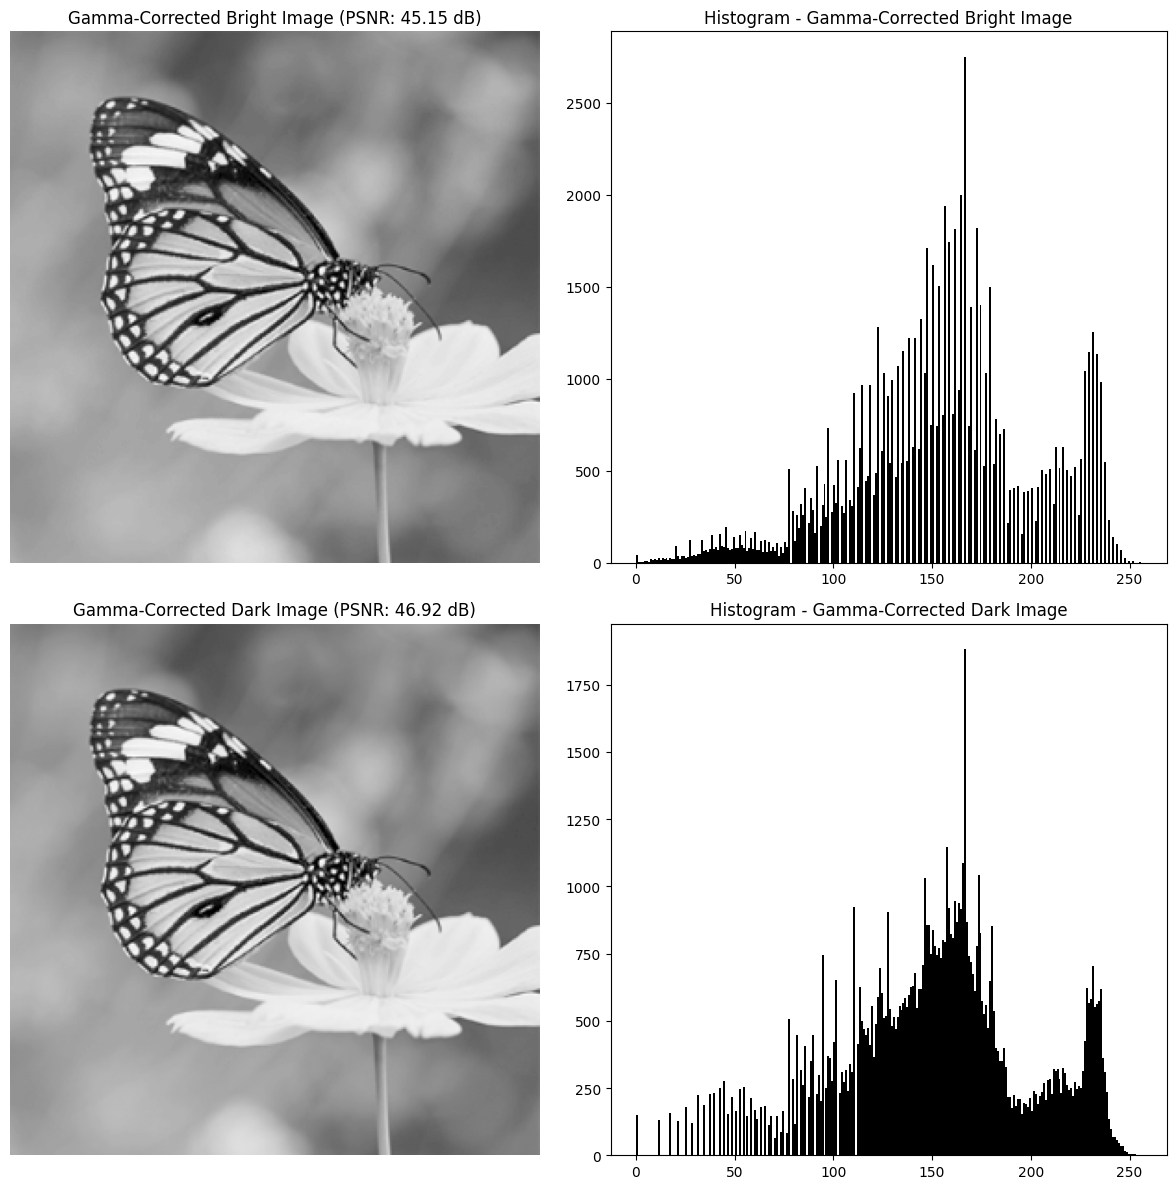

In [119]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(gamma_corrected_bright, cmap='gray')
plt.title(f"Gamma-Corrected Bright Image (PSNR: {psnr_bright_corrected:.2f} dB)")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.hist(gamma_corrected_bright.ravel(), bins=256, range=[0, 256], color='black', alpha=1)
plt.title("Histogram - Gamma-Corrected Bright Image")

plt.subplot(2, 2, 3)
plt.imshow(gamma_corrected_dark, cmap='gray')
plt.title(f"Gamma-Corrected Dark Image (PSNR: {psnr_dark_corrected:.2f} dB)")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.hist(gamma_corrected_dark.ravel(), bins=256, range=[0, 256], color='black', alpha=1)
plt.title("Histogram - Gamma-Corrected Dark Image")

plt.tight_layout()
plt.show()